In [49]:
import tensorflow as tf

print('Tensorflow Version:', tf.__version__)

import os
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RandomCrop
from tensorflow.keras.layers import RandomFlip
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Tensorflow Version: 2.9.1
Num GPUs Available: 0


In [2]:
data_set_training =  r'D:\DUK College\II SEM\CV_DL_RL_Term_Paper\CNN\train'
data_set_test =r'D:\DUK College\II SEM\CV_DL_RL_Term_Paper\CNN\val'
data_OP_test_path =r'D:\DUK College\II SEM\CV_DL_RL_Term_Paper\CNN\testing'

In [4]:

data_train = tf.keras.preprocessing.image_dataset_from_directory(
   data_set_training,
    labels ='inferred',
    label_mode='int',
    class_names=['1-airplane','2-ship','3-other'],
    color_mode ="grayscale",
    batch_size = 32,
    shuffle = True,
    seed = 123)

Found 6178 files belonging to 3 classes.


In [5]:

data_validation = tf.keras.preprocessing.image_dataset_from_directory(
   data_set_test,
    labels ='inferred',
    label_mode='int',
    class_names=['1-airplane','2-ship','3-other'],
    color_mode ="grayscale",
    batch_size = 32,
    shuffle = True,
    seed = 123)

Found 2646 files belonging to 3 classes.


In [6]:
data_OP_test = tf.keras.preprocessing.image_dataset_from_directory(
   data_OP_test_path,
    labels= None,
    label_mode= None,
    class_names=None,
    color_mode ="grayscale",
    batch_size = None,
    shuffle = False,
    seed = None)

Found 2 files belonging to 1 classes.


In [21]:
data_augmentation = Sequential([
    
  tf.keras.layers.Resizing(244, 244),
  tf.keras.layers.Rescaling(1./255),

  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2)
])
pross_train_data = data_train.map(lambda x, y: (data_augmentation(x), y))
pross_test_data = data_validation.map(lambda x, y: (data_augmentation(x), y))
print(pross_train_data)
print(pross_test_data)

<MapDataset element_spec=(TensorSpec(shape=(None, 244, 244, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(None, 244, 244, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
model = Sequential()
model.add(Conv2D(24,(4,4),activation ='relu',input_shape=(244,244,1)))
model.add(MaxPool2D(4,4))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(3))
model.compile(optimizer = keras.optimizers.Adam(),
loss =[keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
metrics=["accuracy"])
hist = model.fit(pross_train_data, validation_data=pross_test_data, epochs=5,)


Epoch 1/5
194/194 [==============================] - 123s 629ms/step - loss: 1.1289 - accuracy: 0.5173 - val_loss: 0.9479 - val_accuracy: 0.5714
Epoch 2/5
194/194 [==============================] - 115s 595ms/step - loss: 0.9363 - accuracy: 0.5843 - val_loss: 0.9246 - val_accuracy: 0.5884
Epoch 3/5
194/194 [==============================] - 116s 596ms/step - loss: 0.8975 - accuracy: 0.6118 - val_loss: 0.8913 - val_accuracy: 0.6039
Epoch 4/5
194/194 [==============================] - 114s 588ms/step - loss: 0.8560 - accuracy: 0.6421 - val_loss: 0.8750 - val_accuracy: 0.6451
Epoch 5/5
194/194 [==============================] - 117s 602ms/step - loss: 0.8250 - accuracy: 0.6458 - val_loss: 0.8479 - val_accuracy: 0.6327


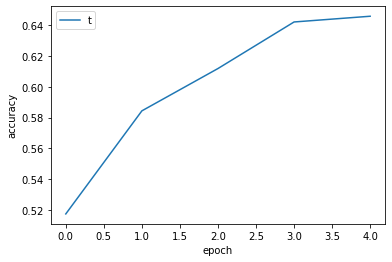

In [9]:
#plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train',loc='upper left')
plt.show()

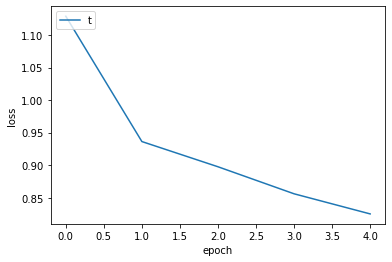

In [10]:
plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train',loc='upper left')

In [22]:
data_augmentationn = Sequential([
  tf.keras.layers.Resizing(244, 244),
  tf.keras.layers.Rescaling(1./255),
])

pross_OP_testing_data = data_OP_test.map(lambda x: (data_augmentationn(x)))

print(pross_OP_testing_data)

<MapDataset element_spec=TensorSpec(shape=(244, 244, 1), dtype=tf.float32, name=None)>


In [73]:
test_img =r'D:\DUK College\II SEM\CV_DL_RL_Term_Paper\upload\upload\2-Style_transfer\000-Data\test\color\1-airplane\plane30.jpg'
imagee = cv2.imread(test_img)
tst_image =cv2.imread(test_img,cv2.IMREAD_GRAYSCALE)
tst_image=cv2.resize(tst_image,(244,244))
tst_image = tst_image/255
tst_image = tst_image[...,tf.newaxis]
print(tst_image.shape)


(244, 244, 1)


In [74]:
tst_image_inp = np.array([tst_image])
print(tst_image_inp.shape)
my_prediction = model.predict(tst_image_inp)
my_prediction.shape
print(my_prediction)

(1, 244, 244, 1)
1/1 [==============================] - 0s 30ms/step
[[1.3802019  0.63162225 0.56840914]]


The image belongs to  1-airplane Class
Image used for prediction below


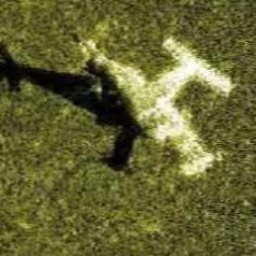

In [82]:
print("The image belongs to ",data_validation.class_names[np.argmax(my_prediction)],"Class")
print("Image used for prediction below")
Image(filename= test_img)